In [69]:
import pandas as pd
import numpy as np
from copy import copy

from sklearn.preprocessing import OneHotEncoder

In [70]:

df_all = pd.read_csv('all_stats.csv')

1980-2022

In [71]:
df_all

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,3143,835,1383,...,190,696,886,371,81,280,297,216,2034,1980
1,1,Tom Abernethy,PF,25,GSW,67,NaN,1222,153,318,...,62,129,191,87,35,12,39,118,362,1980
2,2,Alvan Adams,C,25,PHO,75,NaN,2168,465,875,...,158,451,609,322,108,55,218,237,1118,1980
3,3,Tiny Archibald*,PG,31,BOS,80,80.0,2864,383,794,...,59,138,197,671,106,10,242,218,1131,1980
4,4,Dennis Awtrey,C,31,CHI,26,NaN,560,27,60,...,29,86,115,40,12,15,27,66,86,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,22462,Thaddeus Young,PF,33,TOR,26,0.0,475,67,144,...,40,75,115,45,31,11,22,43,164,2022
22463,22463,Trae Young,PG,23,ATL,76,76.0,2652,711,1544,...,50,234,284,737,72,7,303,128,2155,2022
22464,22464,Omer Yurtseven,C,23,MIA,56,12.0,706,130,247,...,85,209,294,49,17,20,41,84,299,2022
22465,22465,Cody Zeller,C,29,POR,27,0.0,355,51,90,...,50,75,125,22,8,6,19,56,140,2022


In [72]:
df_all = df_all.drop(columns=["Unnamed: 0"])
df_all

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,3143,835,1383,0.604,...,190,696,886,371,81,280,297,216,2034,1980
1,Tom Abernethy,PF,25,GSW,67,NaN,1222,153,318,0.481,...,62,129,191,87,35,12,39,118,362,1980
2,Alvan Adams,C,25,PHO,75,NaN,2168,465,875,0.531,...,158,451,609,322,108,55,218,237,1118,1980
3,Tiny Archibald*,PG,31,BOS,80,80.0,2864,383,794,0.482,...,59,138,197,671,106,10,242,218,1131,1980
4,Dennis Awtrey,C,31,CHI,26,NaN,560,27,60,0.450,...,29,86,115,40,12,15,27,66,86,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,Thaddeus Young,PF,33,TOR,26,0.0,475,67,144,0.465,...,40,75,115,45,31,11,22,43,164,2022
22463,Trae Young,PG,23,ATL,76,76.0,2652,711,1544,0.460,...,50,234,284,737,72,7,303,128,2155,2022
22464,Omer Yurtseven,C,23,MIA,56,12.0,706,130,247,0.526,...,85,209,294,49,17,20,41,84,299,2022
22465,Cody Zeller,C,29,POR,27,0.0,355,51,90,0.567,...,50,75,125,22,8,6,19,56,140,2022


In [73]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  22467 non-null  object 
 1   Pos     22467 non-null  object 
 2   Age     22467 non-null  int64  
 3   Tm      22467 non-null  object 
 4   G       22467 non-null  int64  
 5   GS      21838 non-null  float64
 6   MP      22467 non-null  int64  
 7   FG      22467 non-null  int64  
 8   FGA     22467 non-null  int64  
 9   FG%     22350 non-null  float64
 10  3P      22467 non-null  int64  
 11  3PA     22467 non-null  int64  
 12  3P%     18702 non-null  float64
 13  2P      22467 non-null  int64  
 14  2PA     22467 non-null  int64  
 15  2P%     22277 non-null  float64
 16  eFG%    22350 non-null  float64
 17  FT      22467 non-null  int64  
 18  FTA     22467 non-null  int64  
 19  FT%     21462 non-null  float64
 20  ORB     22467 non-null  int64  
 21  DRB     22467 non-null  int64  
 22

In [74]:
df_all['Year'] = df_all['Year'].astype(int)
df_all['Age'] = df_all['Age'].astype(int)

In [75]:
df_all_not_cleaned = copy(df_all)

In [76]:
agrupado = df_all.groupby('Player')['Year'].apply(list).reset_index()

In [77]:
agrupado

,Player,Year
0,A.C. Green,"[1986, 1987, 1988, 1989, 1990, 1991, 1992, 199..."
1,A.J. Bramlett,[2000]
2,A.J. English,"[1991, 1992]"
3,A.J. Guyton,"[2001, 2002, 2003]"
4,A.J. Hammons,[2017]
...,...,...
3397,Šarūnas Marčiulionis*,"[1990, 1991, 1992, 1993, 1995, 1996, 1997]"
3398,Žan Tabak,"[1995, 1996, 1997, 1998, 1998, 1998, 2000, 2001]"
3399,Žarko Paspalj,[1990]
3400,Žarko Čabarkapa,"[2004, 2005, 2005, 2005, 2006]"


In [78]:
agrupado[agrupado["Player"] == "LeBron James"]["Year"]

2022    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
Name: Year, dtype: object

# Dataset Rookies

In [79]:
df_rookies = pd.read_csv('rookies.csv').drop('Unnamed: 0', axis=1)

1980-2022

In [80]:
df_rookies

,Player,Year
0,Joe Barry Carroll,1980
1,Darrell Griffith,1980
2,Kevin McHale,1980
3,Kelvin Ransey,1980
4,James Ray,1980
...,...,...
1904,Kendall Brown,2022
1905,Isaiah Mobley,2022
1906,Tyrese Martin,2022
1907,JD Davison,2022


In [81]:
df_merged = pd.merge(agrupado, df_rookies[["Player","Year"]], on='Player', how='inner')

In [82]:
df_merged.rename(columns={'Year_y': 'Drafted','Year_x': 'Seasons'}, inplace=True)

In [83]:
df_merged

,Player,Seasons,Drafted
0,A.C. Green,"[1986, 1987, 1988, 1989, 1990, 1991, 1992, 199...",1985
1,A.J. English,"[1991, 1992]",1990
2,A.J. Guyton,"[2001, 2002, 2003]",2000
3,A.J. Hammons,[2017],2016
4,A.J. Price,"[2010, 2011, 2012, 2013, 2014, 2015, 2015, 201...",2009
...,...,...,...
1729,Zach Randolph,"[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2001
1730,Zeke Nnaji,"[2021, 2022]",2020
1731,Zhaire Smith,"[2019, 2020]",2018
1732,Ziaire Williams,[2022],2021


Por algun motivo existen valores repetidos en las listas de años jugados. Por lo que los quitamos.

In [84]:
df_merged['Seasons'] = df_merged['Seasons'].apply(lambda x: list(dict.fromkeys(x)))

Creamos una columna "Duration", que representa la cantidad de temporadas que a jugado el jugador en la NBA.

In [85]:
df_merged["Duration"] = df_merged["Seasons"].apply(lambda x: len(x))

In [86]:
df_merged

,Player,Seasons,Drafted,Duration
0,A.C. Green,"[1986, 1987, 1988, 1989, 1990, 1991, 1992, 199...",1985,16
1,A.J. English,"[1991, 1992]",1990,2
2,A.J. Guyton,"[2001, 2002, 2003]",2000,3
3,A.J. Hammons,[2017],2016,1
4,A.J. Price,"[2010, 2011, 2012, 2013, 2014, 2015]",2009,6
...,...,...,...,...
1729,Zach Randolph,"[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2001,17
1730,Zeke Nnaji,"[2021, 2022]",2020,2
1731,Zhaire Smith,"[2019, 2020]",2018,2
1732,Ziaire Williams,[2022],2021,1


Extraemos los jugadores mal emparejados con merge (Jugadores que tienen mismo nombre y que son emparejados, o jugadores donde falta data)

In [87]:
def extract_bad_data(df, df_al):
    f_seas = list(map(lambda x: x[0][0] - x[1] ,zip(df["Seasons"],df["Drafted"])))

    # Vemos que jugadores no son outlier (han jugado despues de 3 o más temporadas despues de ser drafteados)
    data_erronenea = [x <=2 for x in f_seas]
    include = df.loc[data_erronenea]

    useful2 = df_al['Player'].isin(include['Player'])

    df_al = df_al.loc[useful2]
    return df_al


In [88]:
df_all

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,3143,835,1383,0.604,...,190,696,886,371,81,280,297,216,2034,1980
1,Tom Abernethy,PF,25,GSW,67,NaN,1222,153,318,0.481,...,62,129,191,87,35,12,39,118,362,1980
2,Alvan Adams,C,25,PHO,75,NaN,2168,465,875,0.531,...,158,451,609,322,108,55,218,237,1118,1980
3,Tiny Archibald*,PG,31,BOS,80,80.0,2864,383,794,0.482,...,59,138,197,671,106,10,242,218,1131,1980
4,Dennis Awtrey,C,31,CHI,26,NaN,560,27,60,0.450,...,29,86,115,40,12,15,27,66,86,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,Thaddeus Young,PF,33,TOR,26,0.0,475,67,144,0.465,...,40,75,115,45,31,11,22,43,164,2022
22463,Trae Young,PG,23,ATL,76,76.0,2652,711,1544,0.460,...,50,234,284,737,72,7,303,128,2155,2022
22464,Omer Yurtseven,C,23,MIA,56,12.0,706,130,247,0.526,...,85,209,294,49,17,20,41,84,299,2022
22465,Cody Zeller,C,29,POR,27,0.0,355,51,90,0.567,...,50,75,125,22,8,6,19,56,140,2022


In [89]:
df_all = extract_bad_data(df_merged, df_all)
df_all

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
85,Johnny Davis,PG,24,IND,82,82.0,2912,496,1159,0.428,...,102,124,226,440,110,23,202,178,1300,1980
95,Mike Dunleavy,PG,25,HOU,51,NaN,1036,148,319,0.464,...,26,74,100,210,40,4,110,120,410,1980
140,Gerald Henderson,PG,24,BOS,76,2.0,1061,191,382,0.500,...,37,46,83,147,45,15,109,96,473,1980
158,Eddie Johnson,SG,24,ATL,79,NaN,2622,590,1212,0.487,...,95,105,200,370,120,24,189,216,1465,1980
362,Darrell Allums,PF,22,DAL,22,NaN,276,23,67,0.343,...,19,46,65,25,5,8,23,51,59,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22460,Thaddeus Young,PF,33,TOT,52,1.0,845,141,272,0.518,...,80,128,208,104,54,18,52,81,322,2022
22461,Thaddeus Young,PF,33,SAS,26,1.0,370,74,128,0.578,...,40,53,93,59,23,7,30,38,158,2022
22462,Thaddeus Young,PF,33,TOR,26,0.0,475,67,144,0.465,...,40,75,115,45,31,11,22,43,164,2022
22463,Trae Young,PG,23,ATL,76,76.0,2652,711,1544,0.460,...,50,234,284,737,72,7,303,128,2155,2022


Para los unicos que podemos realmente evaluar en nuestro dataset si han jugado 5 años o más en la NBA es a los jugadores drafteados en el año 2018.

In [90]:
def players_before(df, df_al, n):
    corpus = df[df["Drafted"] < n]

    useful = df_al['Player'].isin(corpus['Player'])

    df_al = df_al.loc[useful]

    return df_al

In [91]:
df_all = players_before(df_merged, df_all, 2019)
df_all

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
95,Mike Dunleavy,PG,25,HOU,51,NaN,1036,148,319,0.464,...,26,74,100,210,40,4,110,120,410,1980
140,Gerald Henderson,PG,24,BOS,76,2.0,1061,191,382,0.500,...,37,46,83,147,45,15,109,96,473,1980
158,Eddie Johnson,SG,24,ATL,79,NaN,2622,590,1212,0.487,...,95,105,200,370,120,24,189,216,1465,1980
362,Darrell Allums,PF,22,DAL,22,NaN,276,23,67,0.343,...,19,46,65,25,5,8,23,51,59,1981
386,Michael Brooks,SF,22,SDC,82,NaN,2479,488,1018,0.479,...,210,232,442,208,99,31,163,234,1202,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22460,Thaddeus Young,PF,33,TOT,52,1.0,845,141,272,0.518,...,80,128,208,104,54,18,52,81,322,2022
22461,Thaddeus Young,PF,33,SAS,26,1.0,370,74,128,0.578,...,40,53,93,59,23,7,30,38,158,2022
22462,Thaddeus Young,PF,33,TOR,26,0.0,475,67,144,0.465,...,40,75,115,45,31,11,22,43,164,2022
22463,Trae Young,PG,23,ATL,76,76.0,2652,711,1544,0.460,...,50,234,284,737,72,7,303,128,2155,2022


Obtenemos el target de nuestra muestra (jugadores que han jugado más de 5 años)

In [92]:
def get_target(df, df_al):
    target = df[df["Duration"] >= 5]
    target = target[["Player"]]

    esta_en_subset = df_al['Player'].isin(target['Player'])

    df_al.loc[:, 'target'] = esta_en_subset.astype(int)

    return df_al
    

In [93]:
df_all = get_target(df_merged, df_all)
df_all

C:\Users\q0gam\AppData\Local\Temp\ipykernel_27600\984992039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al.loc[:, 'target'] = esta_en_subset.astype(int)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,target
95,Mike Dunleavy,PG,25,HOU,51,NaN,1036,148,319,0.464,...,74,100,210,40,4,110,120,410,1980,1
140,Gerald Henderson,PG,24,BOS,76,2.0,1061,191,382,0.500,...,46,83,147,45,15,109,96,473,1980,1
158,Eddie Johnson,SG,24,ATL,79,NaN,2622,590,1212,0.487,...,105,200,370,120,24,189,216,1465,1980,1
362,Darrell Allums,PF,22,DAL,22,NaN,276,23,67,0.343,...,46,65,25,5,8,23,51,59,1981,0
386,Michael Brooks,SF,22,SDC,82,NaN,2479,488,1018,0.479,...,232,442,208,99,31,163,234,1202,1981,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22460,Thaddeus Young,PF,33,TOT,52,1.0,845,141,272,0.518,...,128,208,104,54,18,52,81,322,2022,1
22461,Thaddeus Young,PF,33,SAS,26,1.0,370,74,128,0.578,...,53,93,59,23,7,30,38,158,2022,1
22462,Thaddeus Young,PF,33,TOR,26,0.0,475,67,144,0.465,...,75,115,45,31,11,22,43,164,2022,1
22463,Trae Young,PG,23,ATL,76,76.0,2652,711,1544,0.460,...,234,284,737,72,7,303,128,2155,2022,0


Por ahora, no usamos el Año

In [94]:
df_all = df_all.drop(columns=["Year"])

In [95]:
df_all.sort_values('Age', inplace=True)

In [96]:
first_season = df_all.drop_duplicates(subset=['Player'],keep='first')

In [97]:
first_season

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,target
19920,Jaren Jackson Jr.,PF,19,MEM,58,56.0,1515,298,589,0.506,...,73,199,272,64,52,82,98,220,798,0
17702,Noah Vonleh,PF,19,CHO,25,0.0,259,30,76,0.395,...,28,58,86,4,4,9,11,20,83,1
19502,Jayson Tatum,SF,19,BOS,80,80.0,2443,397,835,0.475,...,50,352,402,128,83,58,114,170,1112,1
19131,Markelle Fultz,SG,19,PHI,14,0.0,253,45,111,0.405,...,11,32,43,53,12,4,17,22,100,1
16128,Maurice Harkless,SF,19,ORL,76,59.0,1974,260,564,0.461,...,122,213,335,50,88,62,69,144,625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,Ervin Johnson,C,26,SEA,45,3.0,280,44,106,0.415,...,48,70,118,7,10,22,24,45,117,1
5786,Josh Grant,PF,26,GSW,53,0.0,382,59,146,0.404,...,27,62,89,24,18,8,30,62,157,0
1833,Ron Anderson,SF,26,CLE,36,7.0,520,84,195,0.431,...,39,49,88,34,9,7,34,40,210,1
1183,Mark Eaton,C,26,UTA,81,32.0,1528,146,353,0.414,...,86,376,462,112,24,275,140,257,351,1


OneHotEncoding

In [98]:
def OHE(df, colm):

    categorias = list(df[colm].unique())
    print(categorias)

    y = [[s] for s in df[colm]]

    enc = OneHotEncoder(categories=[categorias])
    enc.fit(y)
    ohe_type = enc.transform(y).toarray()

    df_ohe = pd.DataFrame(ohe_type, columns=categorias)
    df = df.drop(columns=[colm]).reset_index(drop=True)

    result = pd.merge(df, df_ohe, left_index=True, right_index=True)

    return result

* Posicion

In [99]:
first_season_wc = OHE(first_season, "Pos")

['PF', 'SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C', 'C-PF']


In [100]:
first_season_wc

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,SF,SG,C,PG,SG-SF,PF-SF,SG-PG,SF-PF,PF-C,C-PF
0,Jaren Jackson Jr.,19,MEM,58,56.0,1515,298,589,0.506,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Noah Vonleh,19,CHO,25,0.0,259,30,76,0.395,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jayson Tatum,19,BOS,80,80.0,2443,397,835,0.475,105,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Markelle Fultz,19,PHI,14,0.0,253,45,111,0.405,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Maurice Harkless,19,ORL,76,59.0,1974,260,564,0.461,32,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,Ervin Johnson,26,SEA,45,3.0,280,44,106,0.415,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1528,Josh Grant,26,GSW,53,0.0,382,59,146,0.404,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1529,Ron Anderson,26,CLE,36,7.0,520,84,195,0.431,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530,Mark Eaton,26,UTA,81,32.0,1528,146,353,0.414,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Equipos

In [101]:
categorias = list(first_season["Tm"].unique())
print(categorias)

['MEM', 'CHO', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'SEA', 'HOU', 'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL', 'CLE', 'CHA', 'PHO', 'NOH', 'CHI', 'WAS', 'CHH', 'BRK', 'SAS', 'POR', 'LAC', 'OKC', 'NOP', 'NOK', 'VAN', 'NJN', 'DAL', 'TOR', 'WSB', 'TOT', 'SDC', 'KCK']


In [102]:
def normalice_teams(df):
    df.loc[:,'Tm'] = df['Tm'].replace('SDC', 'LAC')
    df.loc[:,'Tm'] = df['Tm'].replace('SEA', 'OKC')
    df.loc[:,'Tm'] = df['Tm'].replace('KCK', 'SAC')
    df.loc[:,'Tm'] = df['Tm'].replace('VAN', 'MEM')
    df.loc[:,'Tm'] = df['Tm'].replace('WSB', 'WAS')
    df.loc[:,'Tm'] = df['Tm'].replace('CHH', 'CHA').replace("CHO","CHA")
    df.loc[:,'Tm'] = df['Tm'].replace('NOH', 'NOK').replace("NOP","NOK")
    df.loc[:,'Tm'] = df['Tm'].replace("BKN","NJN").replace("BRK","NJN")
    return df

first_season_wc = normalice_teams(first_season_wc)

In [103]:
first_season_wc = OHE(first_season_wc, "Tm")

['MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU', 'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL', 'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL', 'TOR', 'TOT']


In [104]:
first_season_wc

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,NOK,CHI,WAS,NJN,SAS,POR,LAC,DAL,TOR,TOT
0,Jaren Jackson Jr.,19,58,56.0,1515,298,589,0.506,51,142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Noah Vonleh,19,25,0.0,259,30,76,0.395,5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jayson Tatum,19,80,80.0,2443,397,835,0.475,105,242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Markelle Fultz,19,14,0.0,253,45,111,0.405,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Maurice Harkless,19,76,59.0,1974,260,564,0.461,32,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,Ervin Johnson,26,45,3.0,280,44,106,0.415,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1528,Josh Grant,26,53,0.0,382,59,146,0.404,17,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1529,Ron Anderson,26,36,7.0,520,84,195,0.431,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530,Mark Eaton,26,81,32.0,1528,146,353,0.414,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
first_season_wc.isnull().sum()

array([  0,   0,   0,  41,   0,   0,   0,   5,   0,   0, 173,   0,   0,
         6,   5,   0,   0,  33,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=int64)

Como vemos que existen datos nulos en estas columnas, hay que ver que puede estar causando esto para no perder estos datos.

In [155]:
#El problema era que las estadisticas de porcentajes tenian valor NaN cuando el jugador nunca habia hecho un tiro por ejemplo,
#a estas les dimos el valor de -1 y por otro lado estaba la estadistica GS la cual cuenta la cantidad de partidos en los que el jugador fue titular
#y daba valores NaN cuando el jugador no habia jugado un partido por lo cual lo cambiamos por un 0.
first_season_wc['GS'].fillna(0, inplace=True)
first_season_wc['3P%'].fillna(-1, inplace=True)
first_season_wc['FT%'].fillna(-1, inplace=True)
first_season_wc['FG%'].fillna(-1, inplace=True)
first_season_wc['2P%'].fillna(-1, inplace=True)
first_season_wc['eFG%'].fillna(-1, inplace=True)

In [159]:
#Ahora deberian haber 0 datos nulos en todas las columnas
first_season_wc.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [157]:
first_season_wc.to_csv('data_final.csv', index=False)

## Mas Data

In [106]:
intento = pd.read_csv('all_seasons.csv')
intento = intento.drop(columns=["Unnamed: 0"])

intento

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [107]:
intento_ = intento[intento['draft_year'] != 'Undrafted']

intento_.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


Arreglamos el formato de las columnas

In [108]:
intento_.loc[:,'season'] = intento_['season'].map(lambda x:x.split("-")[0]).astype(int)
intento_.loc[:,'draft_year'] = intento_['draft_year'].astype(int)

In [109]:
intento_.rename(columns={'player_name': 'Player','draft_year': 'Drafted',"season":"Seasons","team_abbreviation":"Tm"}, inplace=True)

C:\Users\q0gam\AppData\Local\Temp\ipykernel_27600\755985514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intento_.rename(columns={'player_name': 'Player','draft_year': 'Drafted',"season":"Seasons","team_abbreviation":"Tm"}, inplace=True)


In [110]:
intento_ = normalice_teams(intento_)

In [111]:
categorias = list(intento_["Tm"].unique())
print(len(categorias))

30


Agrupamos los datos por jugador

In [112]:
groped_try = intento_.groupby('Player').agg({'Seasons': list, 'Drafted': 'first'}).reset_index()
groped_try["Duration"] = groped_try["Seasons"].apply(lambda x: len(x))
groped_try

,Player,Seasons,Drafted,Duration
0,A.C. Green,"[1996, 1997, 1998, 1999, 2000]",1985,5
1,A.J. Bramlett,[1999],1999,1
2,A.J. Guyton,"[2000, 2001, 2002]",2000,3
3,AJ Griffin,[2022],2022,1
4,AJ Hammons,[2016],2016,1
...,...,...,...,...
1788,Zhou Qi,"[2017, 2018]",2016,2
1789,Ziaire Williams,"[2021, 2022]",2021,2
1790,Zion Williamson,"[2019, 2020, 2022]",2019,3
1791,Zoran Planinic,"[2003, 2004, 2005]",2003,3


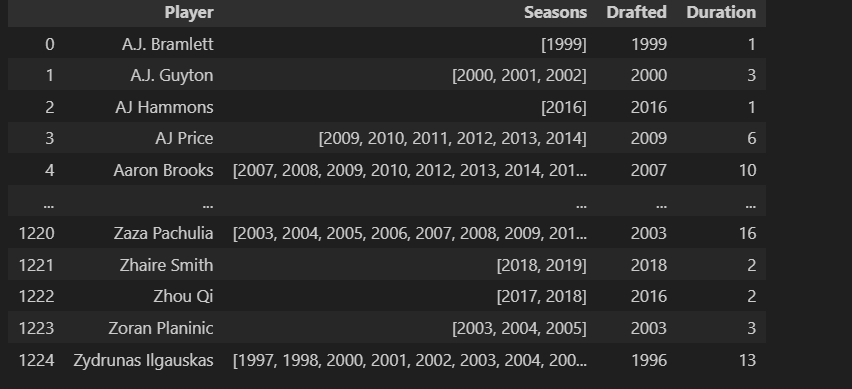

In [113]:
groped_try.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Player    1793 non-null   object
 1   Seasons   1793 non-null   object
 2   Drafted   1793 non-null   object
 3   Duration  1793 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 56.2+ KB


Para los unicos que podemos realmente evaluar en nuestro dataset si han jugado 5 años o más en la NBA es a los jugadores drafteados en el año 2018.

In [114]:
intento_ = players_before(groped_try,intento_, 2019)
intento_

,Player,Tm,age,player_height,player_weight,college,country,Drafted,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Seasons
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996
2,George Lynch,MEM,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,Jevon Carter,MIL,27.0,185.42,90.718400,West Virginia,USA,2018,2,32,...,8.0,2.5,2.4,1.9,0.018,0.084,0.149,0.560,0.150,2022
12834,Jimmy Butler,MIA,33.0,200.66,104.326160,Marquette,USA,2011,1,30,...,22.9,5.9,5.3,1.2,0.068,0.121,0.248,0.647,0.264,2022
12836,Joe Harris,NJN,31.0,198.12,99.790240,Virginia,USA,2014,2,33,...,7.6,2.2,1.4,-1.0,0.016,0.089,0.141,0.621,0.091,2022
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022


Extraemos jugadores que no debutaron hasta 3 años depues de ser drafteados (data erronea)

In [115]:
intento_ = extract_bad_data(groped_try, intento_)
intento_

,Player,Tm,age,player_height,player_weight,college,country,Drafted,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Seasons
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996
8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996
9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,3,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,Jevon Carter,MIL,27.0,185.42,90.718400,West Virginia,USA,2018,2,32,...,8.0,2.5,2.4,1.9,0.018,0.084,0.149,0.560,0.150,2022
12834,Jimmy Butler,MIA,33.0,200.66,104.326160,Marquette,USA,2011,1,30,...,22.9,5.9,5.3,1.2,0.068,0.121,0.248,0.647,0.264,2022
12836,Joe Harris,NJN,31.0,198.12,99.790240,Virginia,USA,2014,2,33,...,7.6,2.2,1.4,-1.0,0.016,0.089,0.141,0.621,0.091,2022
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022


Definimos target

In [116]:
intento_ = get_target(groped_try, intento_)
intento_ = intento_.reset_index(drop=True)
intento_

C:\Users\q0gam\AppData\Local\Temp\ipykernel_27600\984992039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al.loc[:, 'target'] = esta_en_subset.astype(int)


,Player,Tm,age,player_height,player_weight,college,country,Drafted,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Seasons,target
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996,1
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996,0
2,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996,0
3,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,1,...,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996,1
4,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,3,...,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,Jevon Carter,MIL,27.0,185.42,90.718400,West Virginia,USA,2018,2,32,...,2.5,2.4,1.9,0.018,0.084,0.149,0.560,0.150,2022,1
8385,Jimmy Butler,MIA,33.0,200.66,104.326160,Marquette,USA,2011,1,30,...,5.9,5.3,1.2,0.068,0.121,0.248,0.647,0.264,2022,1
8386,Joe Harris,NJN,31.0,198.12,99.790240,Virginia,USA,2014,2,33,...,2.2,1.4,-1.0,0.016,0.089,0.141,0.621,0.091,2022,1
8387,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022,1


In [117]:
lista1 = set(agrupado["Player"])
lista2 = set(groped_try["Player"])

news = list((lista1^lista2) - (lista1 - lista2))
print(len(news))

226


In [118]:
len(set(news).intersection(set(df_rookies["Player"])))

68

In [119]:
len(set(lista2).intersection(set(df_rookies["Player"])))

1354

In [120]:
print(df_rookies.columns)
print(first_season_wc.columns)
print(intento_.columns)

Index(['Player', 'Year'], dtype='object')
Index(['Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS', 'target', 'PF_y',
       'SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
       'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
       'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
       'TOR', 'TOT'],
      dtype='object')
Index(['Player', 'Tm', 'age', 'player_height', 'player_weight', 'college',
       'country', 'Drafted', 'draft_round', 'draft_number', 'gp', 'pts', 'reb',
       'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct', 'Seasons', 'target'],
      dtype='object')


Unimos nuestro nuevos datos con el dataset de roockies, para ver si ganamos informacion.

In [121]:
first_season2 = intento_.drop_duplicates(subset=['Player'],keep='first')

In [122]:
first_season2

,Player,Tm,age,player_height,player_weight,college,country,Drafted,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Seasons,target
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996,1
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996,0
2,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996,0
3,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,1,...,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996,1
4,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,3,...,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,Vlatko Cancar,DEN,23.0,203.20,107.047712,NaN,Slovenia,2017,2,49,...,0.7,0.2,-6.0,0.109,0.119,0.177,0.507,0.086,2019,0
7581,Michael Porter Jr.,DEN,22.0,208.28,98.883056,Missouri,USA,2018,1,14,...,4.7,0.8,0.7,0.070,0.214,0.211,0.617,0.074,2019,0
7598,Malik Newman,CLE,23.0,190.50,86.182480,Kansas,USA,2018,Undrafted,Undrafted,...,0.0,0.0,-30.4,0.000,0.000,0.571,0.347,0.000,2019,0
7628,Nigel Williams-Goss,UTA,25.0,187.96,86.182480,Gonzaga,USA,2017,2,55,...,0.6,0.6,4.5,0.037,0.070,0.161,0.415,0.158,2019,0


Verificamos si podemos agregar columnas con data que teniamos previamente

In [123]:
roockies_2 = set(df_rookies["Player"]).intersection(set(first_season2["Player"]))
roockies_nuevos = roockies_2 - set(first_season["Player"])

len(roockies_nuevos)

14

In [124]:
df_merged2 = pd.merge(first_season2, df_rookies, left_on='Player',right_on="Player",how="inner")
df_merged2

,Player,Tm,age,player_height,player_weight,college,country,Drafted,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Seasons,target,Year
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996,1,1996
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996,0,1994
2,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,1,...,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996,1,1994
3,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,3,...,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996,1,1994
4,Gary Trent,POR,22.0,203.20,113.398000,Ohio,USA,1995,1,11,...,1.1,2.5,0.101,0.167,0.212,0.569,0.077,1996,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,Gary Trent Jr.,POR,21.0,195.58,94.800728,Duke,USA,2018,2,37,...,1.0,-1.4,0.017,0.052,0.150,0.587,0.064,2019,0,2018
901,Devon Hall,OKC,24.0,195.58,97.522280,Virginia,USA,2018,2,53,...,1.2,3.8,0.019,0.060,0.182,0.298,0.217,2019,0,2018
902,T.J. Leaf,IND,23.0,208.28,100.697424,UCLA,USA,2017,1,18,...,0.3,0.2,0.094,0.174,0.180,0.451,0.057,2019,0,2017
903,Michael Porter Jr.,DEN,22.0,208.28,98.883056,Missouri,USA,2018,1,14,...,0.8,0.7,0.070,0.214,0.211,0.617,0.074,2019,0,2018


In [125]:
df_merged2 = df_merged2.drop(df_merged2[df_merged2['Seasons'] != df_merged2['Year']].index)
df_merged2

,Player,Tm,age,player_height,player_weight,college,country,Drafted,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Seasons,target,Year
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996,1,1996
12,Erick Dampier,IND,21.0,210.82,120.201880,Mississippi State,USA,1996,1,10,...,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996,1,1996
15,Jerome Williams,DET,24.0,205.74,93.439952,Georgetown,USA,1996,1,26,...,0.2,3.0,0.144,0.182,0.181,0.419,0.071,1996,1,1996
19,John Wallace,NYK,23.0,205.74,102.058200,Syracuse,USA,1996,1,18,...,0.5,2.7,0.080,0.148,0.204,0.571,0.081,1996,1,1996
22,Jeff McInnis,DEN,22.0,193.04,86.182480,North Carolina,USA,1996,2,37,...,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996,1,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Miles Bridges,CHA,21.0,200.66,102.058200,Michigan State,USA,2018,1,12,...,1.2,-3.7,0.037,0.148,0.147,0.548,0.081,2018,0,2018
896,Mo Bamba,ORL,21.0,213.36,100.243832,University of Texas at Austin,USA,2018,1,6,...,0.8,-14.9,0.074,0.213,0.174,0.539,0.086,2018,1,2018
897,Moritz Wagner,LAL,22.0,210.82,111.130040,Michigan,Germany,2018,1,25,...,0.6,-9.8,0.035,0.142,0.210,0.533,0.084,2018,1,2018
898,Lonnie Walker IV,SAS,20.0,195.58,92.986360,Miami,USA,2018,1,18,...,0.5,-24.3,0.000,0.122,0.196,0.446,0.143,2018,1,2018


In [126]:
def add_new_data(df, to_add, df_l, mode):
    esta_en_subset = df['Player'].isin(to_add)
    df = df.loc[esta_en_subset].reset_index(drop=True)

    # eliminamos columnas nulas
    try:
        df = df.drop(columns=["college"])
    except KeyError:
        print("Columna no existente")

    # Estandarizamos los nombres de las columnas
    if mode == 1:
        df.rename(columns={'team_abbreviation': 'Tm','age': 'Age',
                            "gp":'G',
                            "DREB":"DRB", "OREB":"ORB",
                            "ts_pct":"TS%", 'MIN':'MP',
                            "3P Made":"3P",'REB':'TREB',       
                            }, inplace=True)
    else:
        df.rename(columns={'STL_x': 'STL',"FTA_y":"FTA",
                           "FT%_y":"FT%",
                            '3PA_y':"3PA", "3P%_y":"3P%",
                            'PTS_y':"PTS", 'FGA_y':"FGA",
                            'FG%_y':"FG%",'AST_y':"AST_y",
                            'BLK_y':"BLK", "TOV_y":"TOV"
                            }, inplace=True)
        
    
    # Obtenemos las columnas en común
    columns_useful = list(set(df_l.columns).intersection(df.columns))
    data_to_add = df[columns_useful]

    df_l = df_l.reset_index(drop=True)
    data_to_add = data_to_add.reset_index(drop=True)

    # Agregamos las filas de datos
    df_combinado = pd.concat([df_l, data_to_add], ignore_index=True, sort=False)

    return df_combinado

    # # Quitamos los atributos cualitativos
    # df_combinado = OHE(df_combinado,"Tm")
    # return df_combinado

In [127]:
df_combinado = add_new_data(df_merged2, roockies_nuevos, first_season, 1)

In [128]:
df_combinado[df_combinado["Player"] == "Joel Embiid"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,target


In [129]:
df_all3 = pd.read_csv("NBA_Player_Stats.csv")
df_all3

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14568,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2021-2022
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-2022
14570,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2021-2022
14571,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2021-2022


In [130]:
df_all3 = normalice_teams(df_all3)

In [131]:
# Cuantos roockies nuevos gano
roockies_2 = set(df_rookies["Player"]).intersection(set(df_all3["Player"]))
roockies_nuevos2 = roockies_2 - set(first_season["Player"])

keep = roockies_nuevos2 - roockies_nuevos

len(keep)

158

In [132]:
df_merged3 = pd.merge(df_all3, df_rookies, left_on='Player',right_on="Player",how="inner")
df_merged3 = df_merged3.drop(columns="Rk")
df_merged3 = df_merged3.reset_index(drop=True)
df_merged3

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year_x,Year_y
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998,1990
1,Mahmoud Abdul-Rauf,PG,31,MEM,41,0,11.9,2.9,6.0,0.488,...,0.5,0.6,1.9,0.2,0.0,0.6,1.2,6.5,2000-2001,1990
2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998,1997
3,Tariq Abdul-Wahad,SG,24,SAC,49,49,24.6,3.6,8.3,0.435,...,2.3,3.8,1.0,1.0,0.3,1.4,2.5,9.3,1998-1999,1997
4,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,0.424,...,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,1999-2000,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,JT Thor,PF,19,CHA,33,0,7.9,0.7,1.7,0.436,...,1.0,1.3,0.6,0.2,0.3,0.3,0.8,2.0,2021-2022,2021
9430,Franz Wagner,SF,20,ORL,79,79,30.7,5.8,12.3,0.468,...,3.4,4.5,2.9,0.9,0.4,1.5,2.1,15.2,2021-2022,2021
9431,Joe Wieskamp,SG,22,SAS,29,0,7.1,0.7,1.9,0.357,...,0.3,0.5,0.3,0.1,0.1,0.1,0.5,2.1,2021-2022,2021
9432,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,0.463,...,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,2021-2022,2021


In [133]:
df_merged3 = df_merged3.drop_duplicates(subset=['Player'],keep='first')

In [134]:
df_merged3

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year_x,Year_y
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998,1990
2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998,1997
12,Shareef Abdur-Rahim,SF,21,MEM,82,82,36.0,8.0,16.4,0.485,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998,1996
25,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998,1995
32,Derek Anderson,SF,23,CLE,66,13,27.9,3.6,8.9,0.408,...,2.0,2.8,3.4,1.3,0.2,1.9,2.1,11.7,1997-1998,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,JT Thor,PF,19,CHA,33,0,7.9,0.7,1.7,0.436,...,1.0,1.3,0.6,0.2,0.3,0.3,0.8,2.0,2021-2022,2021
9430,Franz Wagner,SF,20,ORL,79,79,30.7,5.8,12.3,0.468,...,3.4,4.5,2.9,0.9,0.4,1.5,2.1,15.2,2021-2022,2021
9431,Joe Wieskamp,SG,22,SAS,29,0,7.1,0.7,1.9,0.357,...,0.3,0.5,0.3,0.1,0.1,0.1,0.5,2.1,2021-2022,2021
9432,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,0.463,...,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,2021-2022,2021


In [135]:
add_new_data(df_merged3, keep, df_combinado, 0)

Columna no existente


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,target
0,Jaren Jackson Jr.,PF,19.0,MEM,58,56.0,1515.0,298.0,589.0,0.506,...,73.0,199.0,272.0,64.0,52.0,82.0,98.0,220.0,798.0,0.0
1,Noah Vonleh,PF,19.0,CHO,25,0.0,259.0,30.0,76.0,0.395,...,28.0,58.0,86.0,4.0,4.0,9.0,11.0,20.0,83.0,1.0
2,Jayson Tatum,SF,19.0,BOS,80,80.0,2443.0,397.0,835.0,0.475,...,50.0,352.0,402.0,128.0,83.0,58.0,114.0,170.0,1112.0,1.0
3,Markelle Fultz,SG,19.0,PHI,14,0.0,253.0,45.0,111.0,0.405,...,11.0,32.0,43.0,53.0,12.0,4.0,17.0,22.0,100.0,1.0
4,Maurice Harkless,SF,19.0,ORL,76,59.0,1974.0,260.0,564.0,0.461,...,122.0,213.0,335.0,50.0,88.0,62.0,69.0,144.0,625.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,JT Thor,PF,19.0,CHA,33,0.0,7.9,0.7,1.7,0.436,...,0.3,1.0,1.3,0.6,0.2,0.3,0.3,0.8,2.0,NaN
1693,Franz Wagner,SF,20.0,ORL,79,79.0,30.7,5.8,12.3,0.468,...,1.1,3.4,4.5,2.9,0.9,0.4,1.5,2.1,15.2,NaN
1694,Joe Wieskamp,SG,22.0,SAS,29,0.0,7.1,0.7,1.9,0.357,...,0.1,0.3,0.5,0.3,0.1,0.1,0.1,0.5,2.1,NaN
1695,Aaron Wiggins,SG,23.0,OKC,50,35.0,24.2,3.1,6.7,0.463,...,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,NaN
